# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("xAPI-Edu-Data.csv")

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [3]:
# Print 10 e random elements from the dataset.
df.sample(n=10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
367,M,Jordan,Jordan,lowerlevel,G-02,A,Arabic,S,Father,10,58,51,48,Yes,Good,Above-7,M
232,M,Syria,Syria,MiddleSchool,G-07,A,Quran,F,Father,19,72,15,50,Yes,Good,Above-7,M
296,F,Jordan,Jordan,lowerlevel,G-04,A,Science,F,Mum,98,87,86,84,No,Good,Under-7,H
166,M,KW,KuwaIT,lowerlevel,G-02,B,French,S,Mum,51,82,53,43,No,Bad,Under-7,M
158,M,Tunis,KuwaIT,MiddleSchool,G-07,B,Science,S,Father,22,51,48,10,No,Bad,Above-7,L
129,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,2,2,Yes,Good,Under-7,L
452,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,25,82,52,20,Yes,Good,Above-7,M
468,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,15,9,14,80,No,Bad,Above-7,L
379,M,Jordan,Jordan,lowerlevel,G-02,B,Arabic,S,Father,12,22,59,83,Yes,Bad,Above-7,L
205,F,SaudiArabia,SaudiArabia,MiddleSchool,G-08,B,Arabic,S,Mum,72,51,42,24,Yes,Bad,Above-7,H


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [4]:
# check for null values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [5]:
df[:1]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M


I'd rather not do it by hand... Let's automatise. :)

First we're gonna make big dictionary in which we will store translations for all the columns!

But first we need the column names that we want to change to numbers.

In [6]:
column_names1 = df.loc[:,:"Relation"].columns
column_names2 = df.loc[:,"ParentAnsweringSurvey":"StudentAbsenceDays"].columns
column_names = list(column_names1) + list(column_names2)
column_names.sort()
column_names

['GradeID',
 'NationalITy',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'PlaceofBirth',
 'Relation',
 'SectionID',
 'Semester',
 'StageID',
 'StudentAbsenceDays',
 'Topic',
 'gender']

In [7]:
dictionaries = {}
for column_name in column_names:
    sorted_keys = np.sort(df[column_name].unique())
    dictionaries[column_name] = { key:value for value, key in enumerate(sorted_keys) }
    
dictionaries


{'GradeID': {'G-02': 0,
  'G-04': 1,
  'G-05': 2,
  'G-06': 3,
  'G-07': 4,
  'G-08': 5,
  'G-09': 6,
  'G-10': 7,
  'G-11': 8,
  'G-12': 9},
 'NationalITy': {'Egypt': 0,
  'Iran': 1,
  'Iraq': 2,
  'Jordan': 3,
  'KW': 4,
  'Lybia': 5,
  'Morocco': 6,
  'Palestine': 7,
  'SaudiArabia': 8,
  'Syria': 9,
  'Tunis': 10,
  'USA': 11,
  'lebanon': 12,
  'venzuela': 13},
 'ParentAnsweringSurvey': {'No': 0, 'Yes': 1},
 'ParentschoolSatisfaction': {'Bad': 0, 'Good': 1},
 'PlaceofBirth': {'Egypt': 0,
  'Iran': 1,
  'Iraq': 2,
  'Jordan': 3,
  'KuwaIT': 4,
  'Lybia': 5,
  'Morocco': 6,
  'Palestine': 7,
  'SaudiArabia': 8,
  'Syria': 9,
  'Tunis': 10,
  'USA': 11,
  'lebanon': 12,
  'venzuela': 13},
 'Relation': {'Father': 0, 'Mum': 1},
 'SectionID': {'A': 0, 'B': 1, 'C': 2},
 'Semester': {'F': 0, 'S': 1},
 'StageID': {'HighSchool': 0, 'MiddleSchool': 1, 'lowerlevel': 2},
 'StudentAbsenceDays': {'Above-7': 0, 'Under-7': 1},
 'Topic': {'Arabic': 0,
  'Biology': 1,
  'Chemistry': 2,
  'English': 

I don't like some of these. Inconsistencies happening. Let's fix them.

In [8]:
dictionaries['StageID'] = {'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2}
dictionaries['StudentAbsenceDays'] = {'Under-7': 0, 'Above-7': 1}
dictionaries['gender'] = {'M': 0, 'F': 1}
dictionaries

{'GradeID': {'G-02': 0,
  'G-04': 1,
  'G-05': 2,
  'G-06': 3,
  'G-07': 4,
  'G-08': 5,
  'G-09': 6,
  'G-10': 7,
  'G-11': 8,
  'G-12': 9},
 'NationalITy': {'Egypt': 0,
  'Iran': 1,
  'Iraq': 2,
  'Jordan': 3,
  'KW': 4,
  'Lybia': 5,
  'Morocco': 6,
  'Palestine': 7,
  'SaudiArabia': 8,
  'Syria': 9,
  'Tunis': 10,
  'USA': 11,
  'lebanon': 12,
  'venzuela': 13},
 'ParentAnsweringSurvey': {'No': 0, 'Yes': 1},
 'ParentschoolSatisfaction': {'Bad': 0, 'Good': 1},
 'PlaceofBirth': {'Egypt': 0,
  'Iran': 1,
  'Iraq': 2,
  'Jordan': 3,
  'KuwaIT': 4,
  'Lybia': 5,
  'Morocco': 6,
  'Palestine': 7,
  'SaudiArabia': 8,
  'Syria': 9,
  'Tunis': 10,
  'USA': 11,
  'lebanon': 12,
  'venzuela': 13},
 'Relation': {'Father': 0, 'Mum': 1},
 'SectionID': {'A': 0, 'B': 1, 'C': 2},
 'Semester': {'F': 0, 'S': 1},
 'StageID': {'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2},
 'StudentAbsenceDays': {'Under-7': 0, 'Above-7': 1},
 'Topic': {'Arabic': 0,
  'Biology': 1,
  'Chemistry': 2,
  'English': 

Now let's change the names to the assigned numbers.

In [9]:
df_numerical = df.copy()

for column_name in column_names:
    df_numerical[column_name].replace(dictionaries[column_name], inplace=True)

df_numerical

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,4,4,0,1,0,7,0,0,15,16,2,20,1,1,0,M
1,0,4,4,0,1,0,7,0,0,20,20,3,25,1,1,0,M
2,0,4,4,0,1,0,7,0,0,10,7,0,30,0,0,1,L
3,0,4,4,0,1,0,7,0,0,30,25,5,35,0,0,1,L
4,0,4,4,0,1,0,7,0,0,40,50,12,50,0,0,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,3,3,1,5,0,2,1,0,5,4,5,8,0,0,1,L
476,1,3,3,1,5,0,5,0,0,50,77,14,28,0,0,0,M
477,1,3,3,1,5,0,5,1,0,55,74,25,29,0,0,0,M
478,1,3,3,1,5,0,6,0,0,30,17,14,57,0,0,1,L


In [10]:
df_numerical.var()


gender                         0.232146
NationalITy                    6.097269
PlaceofBirth                   6.908138
StageID                        0.364492
GradeID                        6.072612
SectionID                      0.375048
Topic                         11.481172
Semester                       0.250413
Relation                       0.242480
raisedhands                  947.360543
VisITedResources            1094.286843
AnnouncementsView            708.158312
Discussion                   763.844398
ParentAnsweringSurvey          0.246608
ParentschoolSatisfaction       0.238761
StudentAbsenceDays             0.240079
dtype: float64

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


In [11]:
# Select 5 columns and find out their bias
df_numerical.skew()

gender                      0.564462
NationalITy                 1.715484
PlaceofBirth                1.720447
StageID                     0.333366
GradeID                     0.263863
SectionID                   0.925118
Topic                      -0.004031
Semester                    0.041806
Relation                    0.365370
raisedhands                 0.026962
VisITedResources           -0.342441
AnnouncementsView           0.399243
Discussion                  0.362594
ParentAnsweringSurvey      -0.252767
ParentschoolSatisfaction   -0.445270
StudentAbsenceDays          0.418428
dtype: float64

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='VisITedResources', ylabel='Density'>

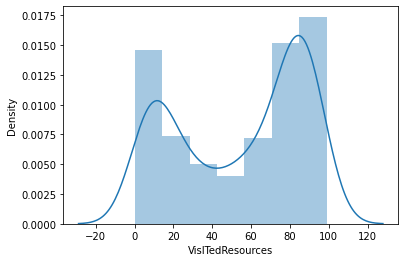

In [13]:
sns.distplot(df.VisITedResources)


<AxesSubplot:xlabel='VisITedResources', ylabel='Density'>

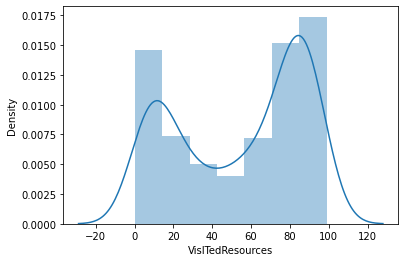

In [14]:
sns.distplot(df.VisITedResources)

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Density'>

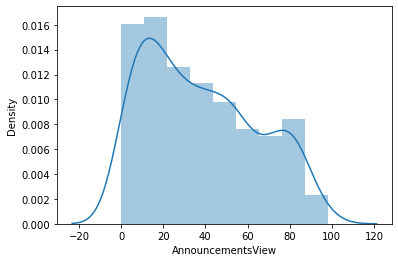

In [15]:
sns.distplot(df.AnnouncementsView)

<AxesSubplot:xlabel='Discussion', ylabel='Density'>

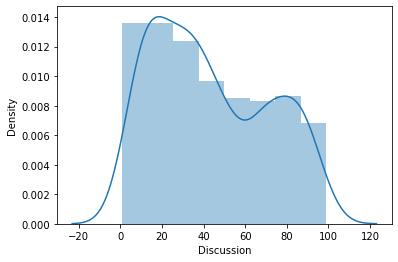

In [16]:
sns.distplot(df.Discussion)

[Text(0, 0, 'IT'),
 Text(1, 0, 'Math'),
 Text(2, 0, 'Arabic'),
 Text(3, 0, 'Science'),
 Text(4, 0, 'English'),
 Text(5, 0, 'Quran'),
 Text(6, 0, 'Spanish'),
 Text(7, 0, 'French'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Biology'),
 Text(10, 0, 'Chemistry'),
 Text(11, 0, 'Geology')]

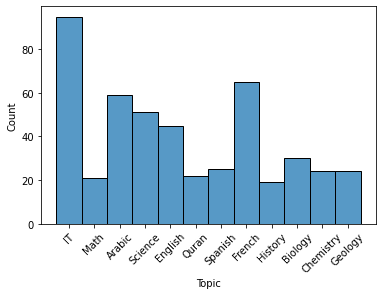

In [17]:
topics = sns.histplot(df.Topic)
topics.set_xticklabels(df.Topic.unique(), rotation=45)


## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [18]:
# Select the top 4 most correlated and put them in a different dataset
df_numerical.corr().replace(1., np.nan)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
gender,NaN,0.023653,0.064895,-0.017793,-0.016869,-0.054907,-0.031769,-0.049156,0.195142,0.149978,0.210932,0.052139,0.124703,0.022359,0.093478,-0.209011
NationalITy,0.023653,NaN,0.786798,0.139212,0.124049,0.069712,0.076718,0.070503,0.003212,0.111533,0.028793,0.062827,-0.063386,0.079380,-0.001701,-0.157116
PlaceofBirth,0.064895,0.786798,NaN,0.176368,0.174026,0.085178,0.143477,0.078554,0.031632,0.077986,0.033798,0.078636,0.006262,0.040887,-0.094594,-0.134554
StageID,-0.017793,0.139212,0.176368,NaN,0.961835,-0.296416,0.047493,0.029512,-0.034205,0.172751,0.068621,0.163666,0.161406,0.114025,-0.014272,-0.112536
GradeID,-0.016869,0.124049,0.174026,0.961835,NaN,-0.303949,0.061389,0.066079,-0.033602,0.182621,0.078262,0.183033,0.168462,0.118246,-0.018421,-0.088342
SectionID,-0.054907,0.069712,0.085178,-0.296416,-0.303949,NaN,0.267445,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,-0.037062
Topic,-0.031769,0.076718,0.143477,0.047493,0.061389,0.267445,NaN,-0.035975,-0.139487,-0.080418,-0.118144,-0.063856,0.054064,0.004730,-0.064087,0.036537
Semester,-0.049156,0.070503,0.078554,0.029512,0.066079,0.046763,-0.035975,NaN,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,-0.072462
Relation,0.195142,0.003212,0.031632,-0.034205,-0.033602,0.005783,-0.139487,0.148705,NaN,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,-0.219687
raisedhands,0.149978,0.111533,0.077986,0.172751,0.182621,-0.143862,-0.080418,0.178358,0.364237,NaN,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882


In [19]:
# Select the top 4 least correlated and create a new dataset without them

# nooo, im too tired. enough. :]

# BUT BUT!!!! There is more below! About that probability! And it's cool, I promiss! :]

## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


In [20]:
# Plot the correlation among themself for the previous 4 variables.

## Step 7:
### For the previoys 4 variables plot them AGAINST the class


In [21]:
# make 4 plot where you plot each of the variables with the class

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

First let's create a function that will format the probability to string in a nice way.

In [30]:
def to_str(probability):
    return str(round(probability*100,2))+'%'

Then - we go the default way we used to deal with panda dataframes.

In [31]:
# %%timeit

low_absence_df = df[df.StudentAbsenceDays=="Under-7"]
low_absence_and_class_L_df = low_absence_df[low_absence_df.Class=="L"]

p1 = low_absence_and_class_L_df.shape[0] / low_absence_df.shape[0]

1.09 ms ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We can see it's not awesomely fast. And also we keep creating a lot of dataframes in the process of just finding some lengths...

In [24]:
to_str(p1)

'3.81%'

Let's try comething faster.

Since we were indexing by boolean lists anyway, we don't have to pull data from the dataframe with these lists. We can do the calculations directly on them.

Also - with numpy we can perform nice sumation of boolean values and also multiply 2 arrays to get element by element boolean "and" operation.

In [32]:
# %%timeit

low_absence = np.array([df.StudentAbsenceDays=="Under-7"])
class_L = np.array([df.Class=="L"])
low_absence_and_class_L = low_absence * class_L

p1 = low_absence_and_class_L.sum() / low_absence.sum()

426 µs ± 31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


It's pretty fuckin quick, right? And also it takes very very less RAM space, since we just operate on bool arrays... NOT WHOLE DATAFRAMES! :)

In [26]:
to_str(p1)

'3.81%'

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

Since it's basicaly the rest of the situations...

In [27]:
p2 = 1.0 - p1
to_str(p2)

'96.19%'

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [28]:
# Bayes time

# I'm not sure if Bayes is necesary here

class_H = np.array([df.Class=="H"])
# let's consider "active student" one that has raised hand over 10 times
active = np.array([df.raisedhands > 10])

# class_H and active
class_H_and_active = class_H * active

p3 = class_H_and_active.sum() / active.sum()

to_str(p3)

'35.34%'

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.

In [29]:
# I would love to but my ADHD fucked with me for the whole day and I started working ~14:30 and then had problems focusing... :|